# **Environment Setup**

In [ ]:
# Common imports
import os
import re
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Selection**
London Airbnb: The datasets were scraped on November 05th, 2019 and contain detailed listings data, review data and calendar data of current Airbnb listings in London. https://www.kaggle.com/datasets/labdmitriy/airbnb/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# define dataset path
data_path = Path('/content/drive/MyDrive/data/')
# Load the listing dataset into a dataframe
listings = pd.read_csv(data_path/'listings.csv', parse_dates=['last_review'], encoding='latin1') # ISO-8859-1
print(f'Loaded Listings: {listings.values.shape[0]} rows and {listings.values.shape[1]} columns')

Loaded Listings: 85068 rows and 106 columns


# **Exploratory Data Analysis (EDA)**
## **EDA: Listings**

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Columns: 106 entries, id to reviews_per_month
dtypes: datetime64[ns](1), float64(23), int64(21), object(61)
memory usage: 68.8+ MB


In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
2,13913,https://www.airbnb.com/rooms/13913,20191105115249,2019-11-06,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,2,1,1,0,0.17
3,38407,https://www.airbnb.com/rooms/38407,20191105115249,2019-11-06,Canary Wharf Immaculate Apt for 2,"The bright, light and stylish apartment in Can...","An entire bright, light and stylish apartment....","The bright, light and stylish apartment in Can...",none,Very easy to get to all the main sites. The tu...,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
4,90700,https://www.airbnb.com/rooms/90700,20191105115249,2019-11-06,Sunny Notting Hill flat & terrace,This is a home not a hotel - for the cost gues...,This charming 1 bedroom with en-suite bathroom...,This is a home not a hotel - for the cost gues...,none,A quick guide or a run through about the area ...,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,3.33



### Drop the un-necessary and redundant columns

In [ ]:
# drop the un-necessary and redundant columns
listings = listings.drop(labels = ["name", "summary", "space", "description", "neighborhood_overview", 'last_review', 'listing_url', 'scrape_id', 'last_scraped', 'notes',
                                   'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
                                   'host_about', 'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_total_listings_count', 'host_verifications',
                                   'host_has_profile_pic', 'neighbourhood_group_cleansed', 'street', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country',
                                   'is_location_exact', 'weekly_price', 'monthly_price', 'minimum_minimum_nights', 'maximum_minimum_nights', 'reviews_per_month',
                                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'calendar_last_scraped',
                                   'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification',
                                   'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis= 1)


### Fixing data types

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           85068 non-null  int64  
 1   experiences_offered          85068 non-null  object 
 2   host_id                      85068 non-null  int64  
 3   host_since                   85056 non-null  object 
 4   host_location                84840 non-null  object 
 5   host_response_time           59168 non-null  object 
 6   host_response_rate           59168 non-null  object 
 7   host_is_superhost            85056 non-null  object 
 8   host_listings_count          85056 non-null  float64
 9   host_identity_verified       85056 non-null  object 
 10  neighbourhood                85067 non-null  object 
 11  neighbourhood_cleansed       85068 non-null  object 
 12  city                         84821 non-null  object 
 13  latitude        

Observe that certain columns, like `host_since`, `host_response_time`, `host_response_rate`, `price`, `security_deposit`, `cleaning_fee`, and `extra_people`, are categorized as objects.

In [ ]:
listings[['host_since', 'host_response_time', 'host_response_rate', 'price', 'security_deposit', 'cleaning_fee', 'extra_people']].head()

,host_since,host_response_time,host_response_rate,price,security_deposit,cleaning_fee,extra_people
0,2009-10-03,within an hour,100%,$88.00,$400.00,$30.00,$20.00
1,2010-07-11,NaN,NaN,$65.00,NaN,NaN,$0.00
2,2009-11-16,within a few hours,90%,$65.00,$100.00,$15.00,$15.00
3,2010-07-12,a few days or more,0%,$79.00,NaN,NaN,$0.00
4,2011-04-07,within a day,86%,$105.00,$0.00,$35.00,$10.00


It appears that `host_response_time` is accurately categorized as an object, while the other features require conversion to numerical format.

In [ ]:
# Convert host_since to datetime
listings['host_since'] = pd.to_datetime(listings['host_since'])

# Convert host_response_rate to numerical
listings['host_response_rate'] = (
    listings['host_response_rate']
    .replace('[\%,]', '', regex=True)
    .astype(float)
)

# Convert price, security_deposit, cleaning_fee, extra_people to numerical
cols_to_convert = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in cols_to_convert:
    listings[col] = (
        listings[col]
        .replace('[$,]', '', regex=True)
        .astype(float)
    )

### Missing Values

In [ ]:
def find_missing_vals(df, label=None):
    is_null = df.isnull()
    null_counts = is_null.sum()
    null_percentages = is_null.mean() * 100

    if label is None:
        label = ""

    nulls_df = pd.DataFrame({
        f'{label} Count of missing/NaN values': null_counts,
        'Percentage of missing values': null_percentages
    }, index=null_counts.index)

    display(nulls_df)

In [ ]:
null_vals = [col for col in listings.columns if listings[col].isnull().sum() > 0]
find_missing_vals(listings[null_vals])

,Count of missing/NaN values,Percentage of missing values
host_since,12,0.014106
host_location,228,0.268021
host_response_time,25900,30.446231
host_response_rate,25900,30.446231
host_is_superhost,12,0.014106
host_listings_count,12,0.014106
host_identity_verified,12,0.014106
neighbourhood,1,0.001176
city,247,0.290356
bathrooms,121,0.142239


### Find Unique values of Categorical Features

In [ ]:
# Calculate the number of unique values for each column
print("Number of unique values in each categorical column:\n")

# Select categorical columns
cat_cols = listings.select_dtypes(include='object').columns

# Iterate over each categorical column
for col in cat_cols:
    unique_values = listings[col].nunique()
    print(f"{col}: {unique_values}")

Number of unique values in each categorical column:

experiences_offered: 5
host_location: 2503
host_response_time: 4
host_is_superhost: 2
host_identity_verified: 2
neighbourhood: 149
neighbourhood_cleansed: 33
city: 707
property_type: 41
room_type: 4
bed_type: 5
amenities: 75093
calendar_updated: 103
first_review: 2802
instant_bookable: 2
cancellation_policy: 8


In [ ]:
cat_df = pd.concat([pd.DataFrame({categorical_feature: listings[categorical_feature].unique()})
                           for categorical_feature in cat_cols], axis=1).fillna('')
cat_df.head()


,experiences_offered,host_location,host_response_time,host_is_superhost,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,property_type,room_type,bed_type,amenities,calendar_updated,first_review,instant_bookable,cancellation_policy
0,family,"London, England, United Kingdom",within an hour,t,t,Brixton,Lambeth,London,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",4 days ago,2010-03-21,t,strict_14_with_grace_period
1,none,GB,,f,f,LB of Croydon,Croydon,Upper Norwood,House,Private room,Futon,{},never,,f,flexible
2,business,"London, England",within a few hours,,,LB of Islington,Islington,Islington,Guest suite,Hotel room,Pull-out Sofa,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",6 months ago,2010-08-18,,moderate
3,romantic,"Kensington, England, United Kingdom",a few days or more,,,LB of Tower Hamlets,Tower Hamlets,Kensington,Townhouse,Shared room,Airbed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",2 weeks ago,2010-09-22,,super_strict_30
4,social,Notting Hill ish London UK,within a day,,,Notting Hill,Kensington and Chelsea,Earlsfield,Serviced apartment,,Couch,"{Internet,Wifi,Kitchen,Heating,Washer,Essentia...",5 weeks ago,2011-06-27,,super_strict_60


## Visualization

In [ ]:
# Analyzing and visualizing the amount of listings by property type

propertytype_num = listings['property_type'].value_counts()

plt.figure(figsize=(15, 8))
ax = sns.countplot(data=listings, y='property_type', color='#32c32f')

# Add the number of listings to each bar
for i, count in enumerate(propertytype_num):
    ax.annotate(str(count), xy=(count+10, i), va='center')

plt.title('London Property Type Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Property Type')
plt.show()

In [ ]:
# Analyzing the prices for different room type and property type
roomProperty = listings.groupby(['property_type','room_type']).price.mean()
roomProperty = roomProperty.reset_index()
roomProperty = roomProperty.sort_values('price',ascending=[0])
roomProperty.head()

,property_type,room_type,price
91,Villa,Entire home/apt,1170.878049
16,Boutique hotel,Hotel room,826.200000
52,Hostel,Hotel room,358.126316
65,Island,Entire home/apt,350.000000
94,Yurt,Entire home/apt,300.000000


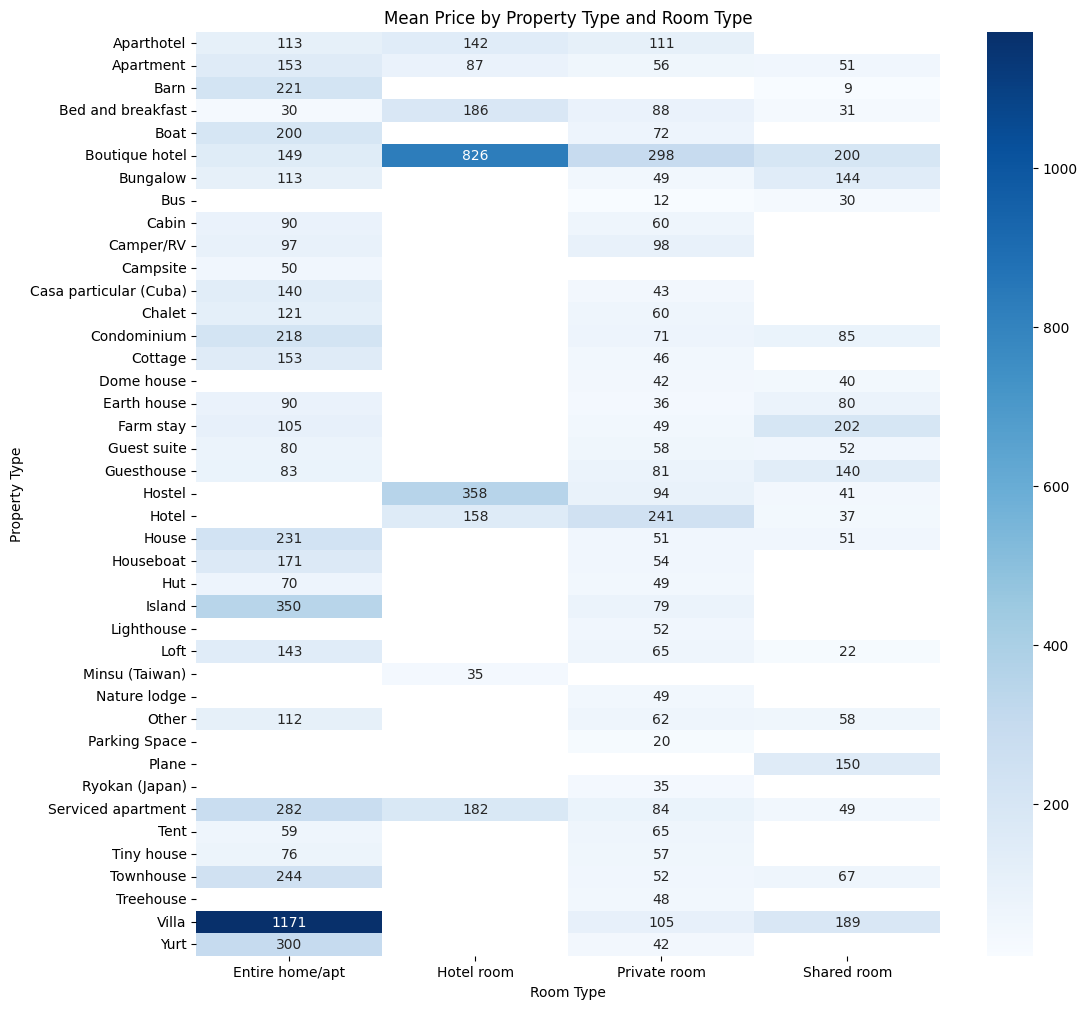

In [ ]:
# Group by property type and room type and calculate the mean price
group_df = listings.groupby(['property_type', 'room_type']).price.mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(group_df, annot=True, fmt=".0f", cmap='Blues')
plt.title('Mean Price by Property Type and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Property Type')
plt.show()


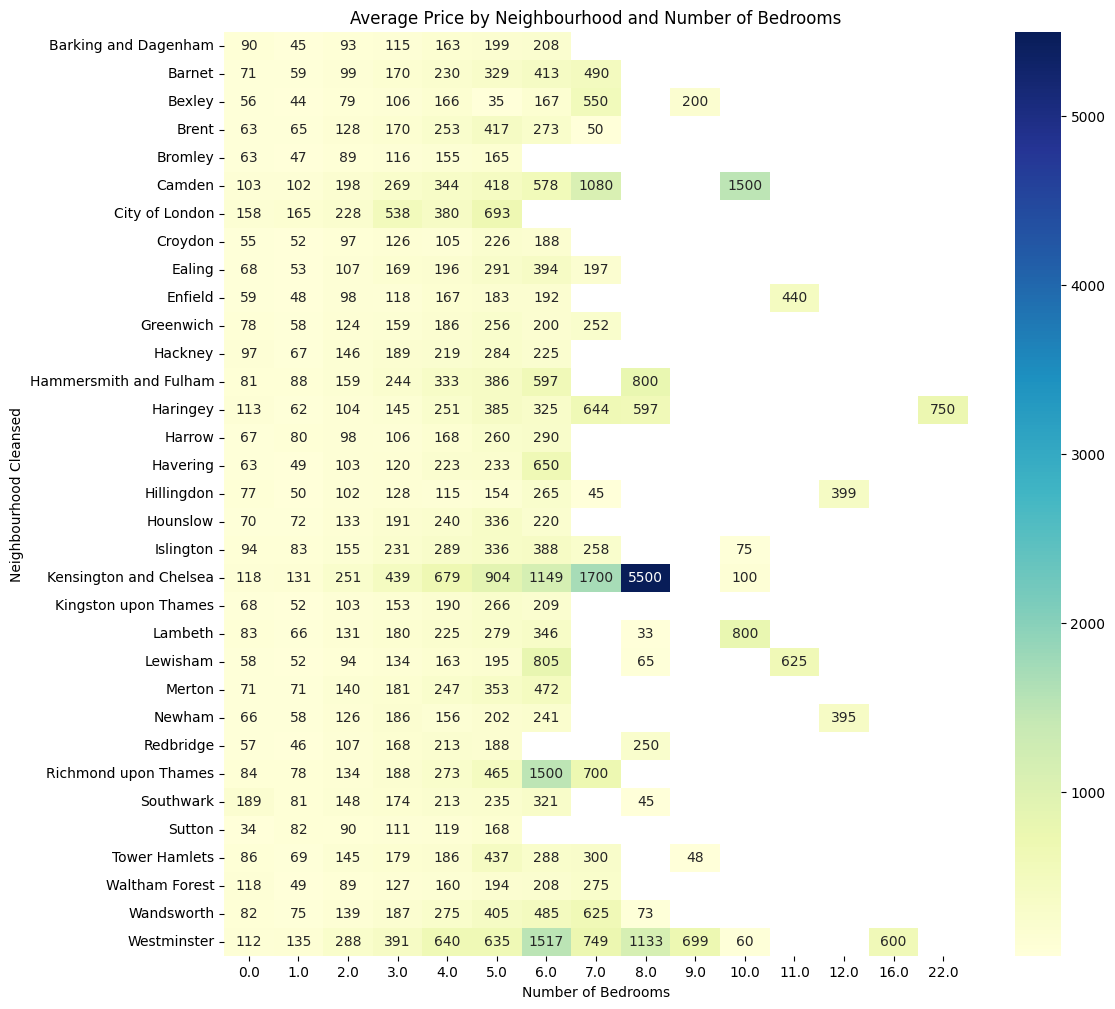

In [ ]:
# Heatmap to show that listing price fluctuation based on number of bedrooms
plt.figure(figsize=(12,12))
sns.heatmap(listings.groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Neighbourhood Cleansed")
plt.title("Average Price by Neighbourhood and Number of Bedrooms")
plt.show()


## London Airbnb Price MAP

<Axes: xlabel='longitude', ylabel='latitude'>

<Figure size 1200x900 with 0 Axes>

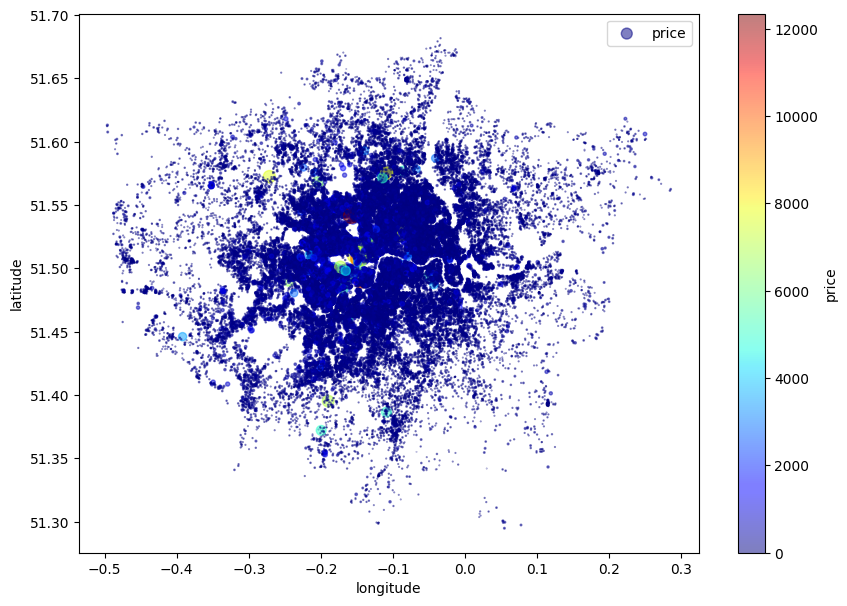

In [ ]:
from PIL import Image

plt.figure(figsize=(12,9))
# import image
image = Image.open("/content/drive/My Drive/data/london_map.png")
# Create the scatter plot
listings.plot(kind="scatter",
        x="longitude",
        y="latitude", alpha=0.5,
        s=listings["price"]/100,
        label="price",
        figsize=(10,7),
        c='price',
        cmap=plt.get_cmap("jet"),
        colorbar=True,
        sharex=False)

## Visualization of categorical variables

In [ ]:
# remove city, amenities and calendar_updated from the categorical list of features
cat_cols = [i for i in cat_cols if i not in ['city', 'host_location', 'amenities', 'calendar_updated',
                                                    'neighbourhood_cleansed', 'property_type', 'amenities', 'first_review']]

cat_cols

['experiences_offered',
 'host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood',
 'room_type',
 'bed_type',
 'instant_bookable',
 'cancellation_policy']

In [ ]:
def get_countplot(cat_list, dataset, hue=None, figheight=15):

  if len(cat_list)%2 == 0:
    nrow = int(len(cat_list)/2)
  else:
    nrow = int((len(cat_list) // 2) + 1)

  fig, ax = plt.subplots(nrow, 2, figsize=(12,5), constrained_layout=True)
  fig.set_figheight(figheight)

  for i, cat_var in enumerate(cat_list):
      j,k = np.unravel_index(i, shape= (nrow, 2))
      cp = sns.countplot(y=cat_var, data=dataset, hue=hue, ax=ax[j,k], palette=["#bcbddc", "#efedf5", "#7fcdbb", "#edf8b1", "#fc9272", "#fee0d2"])
      ax[j,k].set_title(cat_var)

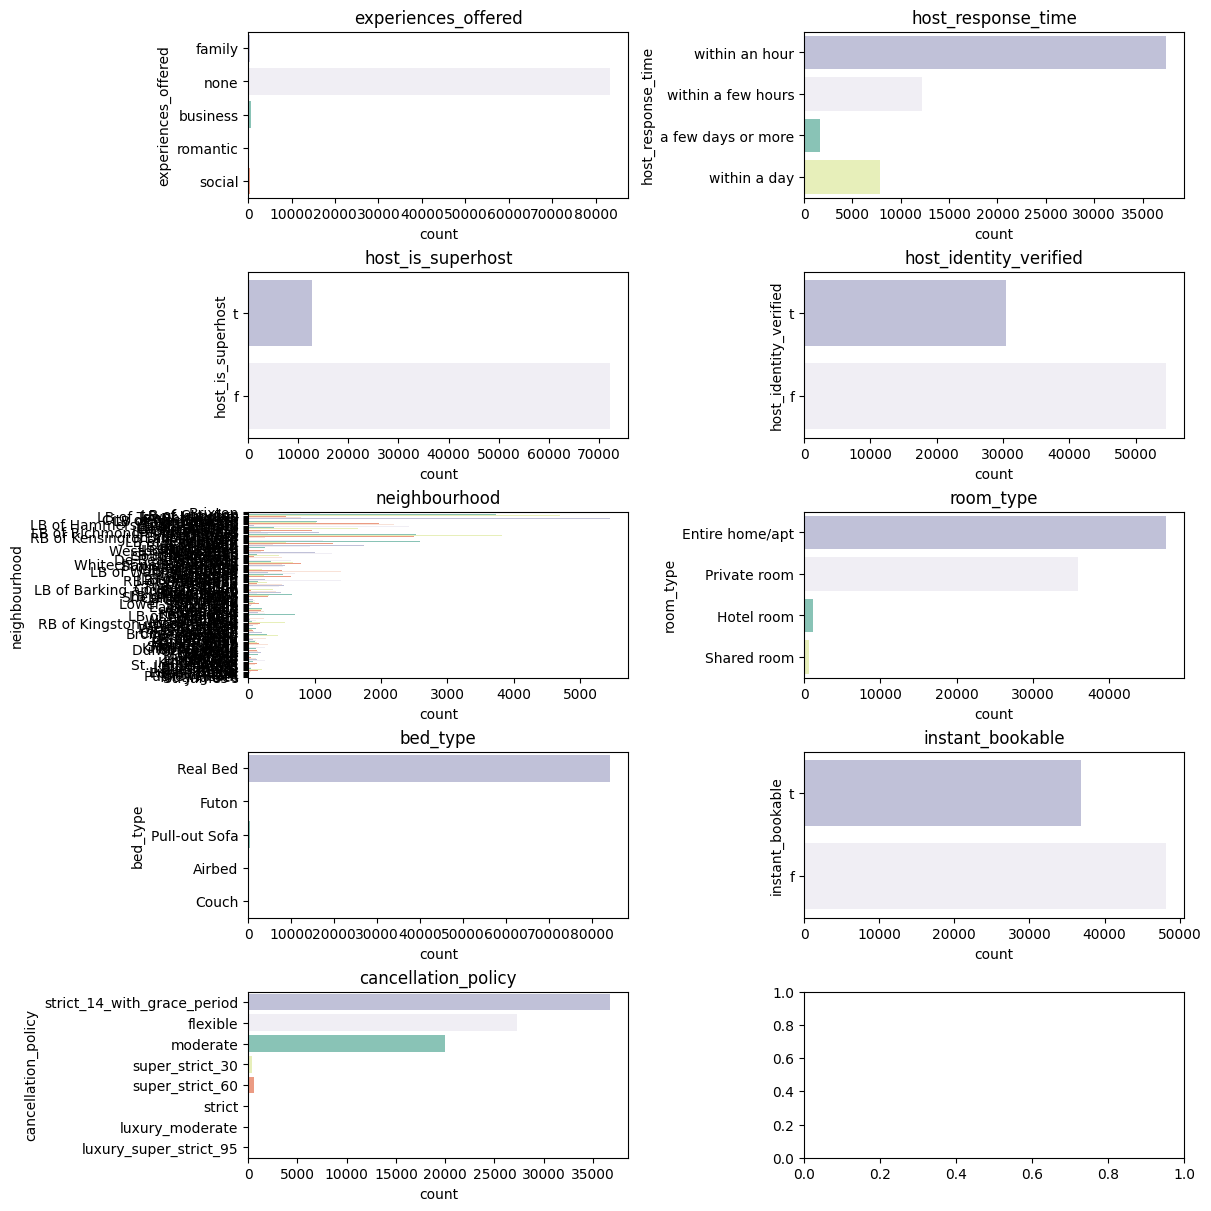

In [ ]:
get_countplot(cat_cols,  dataset=listings, figheight=12)

## Visualization of numerical variables

In [ ]:
num_cols = listings.select_dtypes(['int', 'float']).columns

# Remove host_id, latitude, longitude, price, square_feet, number_of_reviews_ltm as it doesn't need for target value
num_cols = [i for i in num_cols if i not in ['host_id', 'latitude', 'longitude', 'price', 'square_feet', 'number_of_reviews_ltm']]

num_cols

['id',
 'host_response_rate',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

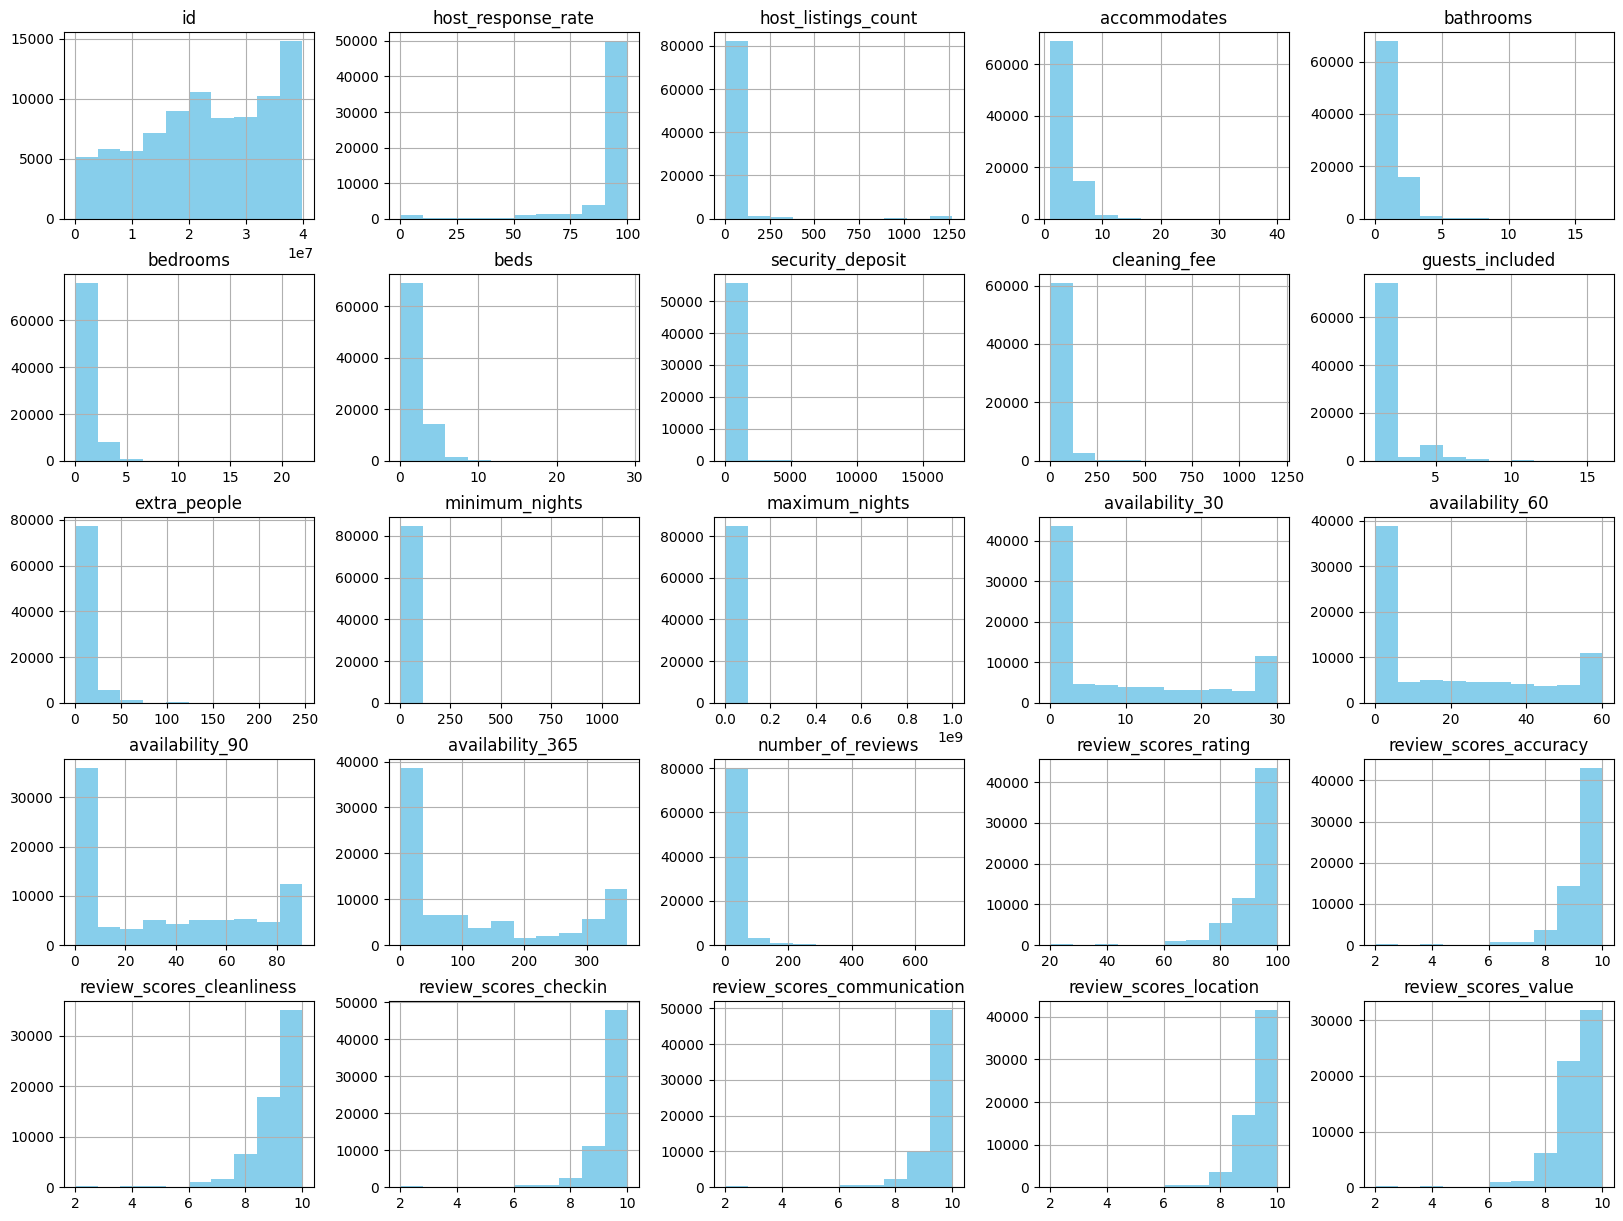

In [ ]:
listings[num_cols].hist(figsize=(20,15), color='skyblue')
plt.show()

# Data Pre-processing

In [ ]:
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p
skew_features = listings[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    listings[i] = boxcox1p(listings[i], boxcox_normmax(listings[i] + 1))

In [ ]:
def one_hot_encoder(df, col):
    encoder = pd.get_dummies(df[col])
    encoder['id'] = df['id']
    # move id column to the first column
    fixed_columns = [encoder.columns[-1]] + list(encoder.columns[:-1])
    encoder = encoder[fixed_columns]
    return encoder

In [ ]:
cat_encoder = one_hot_encoder(listings, cat_cols)
cat_encoder.head()

,id,experiences_offered_business,experiences_offered_family,experiences_offered_none,experiences_offered_romantic,experiences_offered_social,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,...,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_luxury_moderate,cancellation_policy_luxury_super_strict_95,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,11551,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
1,38151,False,False,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2,13913,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
3,38407,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,90700,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False


## Review scores Rating

In [ ]:
listings['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,63446.000000
1,mean,92.546654
2,std,10.202935
3,min,20.000000
4,25%,90.000000
5,50%,96.000000
6,75%,100.000000
7,max,100.000000


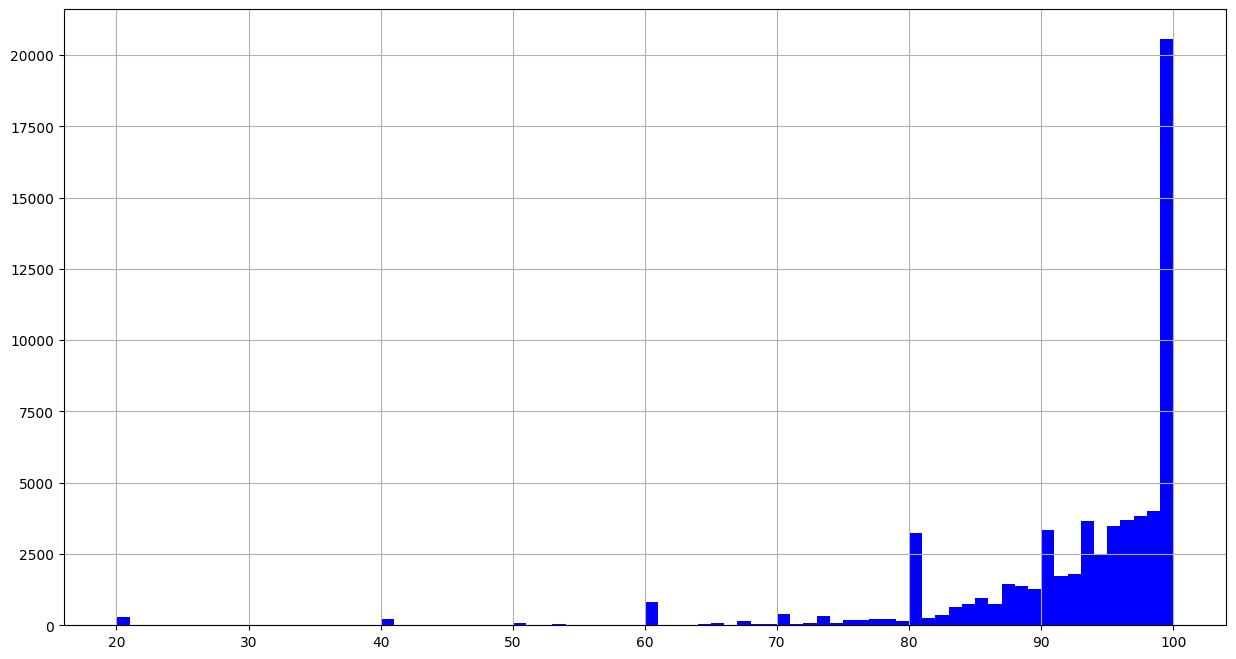

In [ ]:
# cleaning data
review_score_df = listings['review_scores_rating'].dropna()

# plot histgram
plt.figure(figsize=(15, 8))
plt.hist(review_score_df.values, bins=80, color='b')
plt.grid()

################ This is very right skewed distribution.
################ The 75% or more values are 90 points. And the most common thing is 100 points.
################I can say the low score listings are minolity.

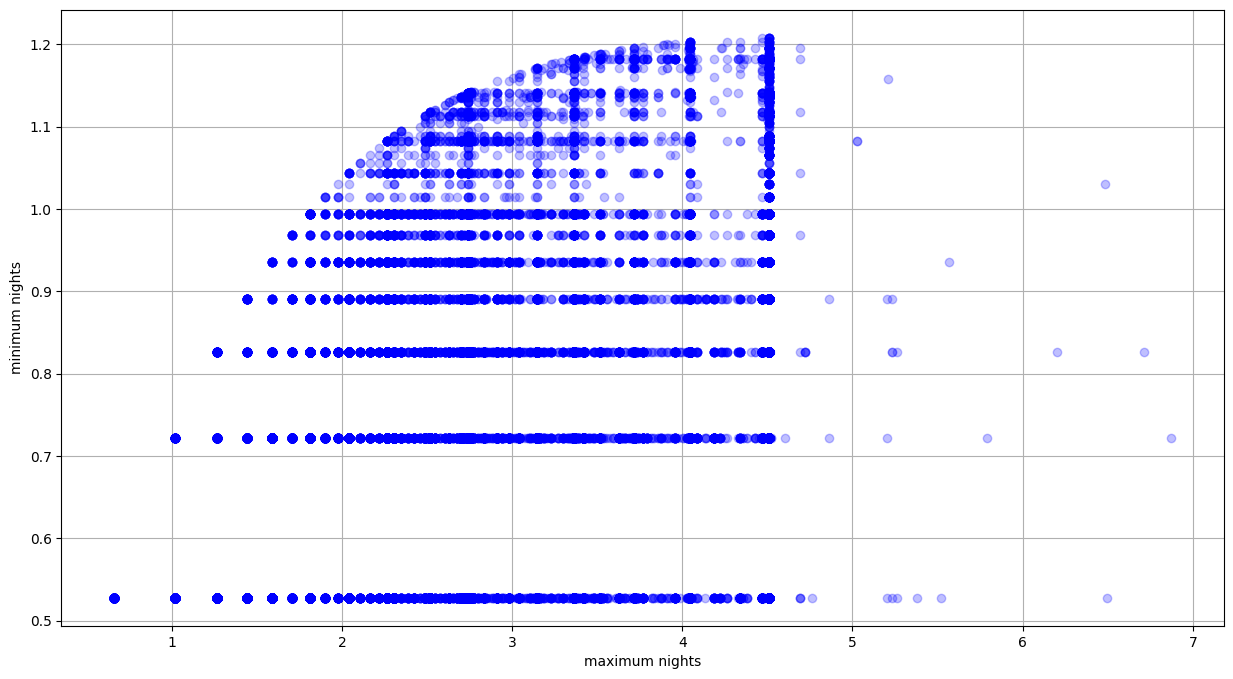

In [ ]:
# For answering the question of 'How long is the period available for lending by rooms?'
listings["min_max_night_diff"] = listings.maximum_nights - listings.minimum_nights

plt.figure(figsize=(15, 8))
plt.plot(listings.maximum_nights, listings.minimum_nights, color='b', marker='o', linewidth=0, alpha=0.25)
plt.xlabel('maximum nights')
plt.ylabel('minimum nights')
plt.grid()

# **Data Mining**

### Clustering Airbnb : KMeans



*   price
*   geographical coordinates (longitude, latitude)
*   property types



In [ ]:
listings['room_type_category'] = np.nan
i = 0
for item in listings.groupby('room_type').price.median().sort_values(ascending=False).index:
    listings.loc[listings['room_type'] == item, 'room_type_category'] = i
    print(f'- {i} - {item}')
    i += 1

listings['room_type_category'] = listings['room_type_category'].astype('int')
listings[['room_type', 'room_type_category']].head()

- 0 - Hotel room
- 1 - Entire home/apt
- 2 - Private room
- 3 - Shared room


,room_type,room_type_category
0,Entire home/apt,1
1,Private room,2
2,Private room,2
3,Entire home/apt,1
4,Entire home/apt,1


In [ ]:
neighbourhood_by_price = (listings
 .groupby('neighbourhood')
 .agg(median_price=('price', 'median'))
 .sort_values(by='median_price', ascending=False)
).index.to_list()

listings['neighbourhood_category'] = np.nan
i = 0
for item in neighbourhood_by_price:
    print(f'- {i} - {item}')
    listings.loc[listings['neighbourhood'] == item, 'neighbourhood_category'] = i
    i += 1
listings['neighbourhood_category'] = listings['neighbourhood_category'].fillna(0).astype(int)
listings[['neighbourhood', 'neighbourhood_category']].head()

- 0 - Belgravia
- 1 - Mayfair
- 2 - Knightsbridge
- 3 - St. James's
- 4 - Covent Garden
- 5 - Soho
- 6 - The West End
- 7 - Westminster
- 8 - Kensington
- 9 - Holland Park
- 10 - Earls Court
- 11 - City of London
- 12 - Fitzrovia
- 13 - Chelsea
- 14 - RB of Kensington and Chelsea
- 15 - Marylebone
- 16 - Holborn
- 17 - Paddington
- 18 - City of Westminster
- 19 - Notting Hill
- 20 - Nine Elms
- 21 - Primrose Hill
- 22 - Westbourne Green
- 23 - Bloomsbury
- 24 - Vauxhall
- 25 - Parsons Green
- 26 - Millbank
- 27 - St. Luke's
- 28 - Bayswater
- 29 - Southwark
- 30 - Lisson Grove
- 31 - Clerkenwell
- 32 - Pimlico
- 33 - St. Pancras
- 34 - Sands End
- 35 - Fulham
- 36 - Islington
- 37 - Kings Cross
- 38 - LB of Camden
- 39 - South Bank
- 40 - Shoreditch
- 41 - Wapping
- 42 - Camden Town
- 43 - Isle of Dogs
- 44 - East Dulwich
- 45 - Tooting Bec
- 46 - Richmond
- 47 - Dulwich Village
- 48 - Hammersmith
- 49 - Canonbury
- 50 - LB of Hammersmith & Fulham
- 51 - De Beauvoir Town
- 52 - St. Joh

,neighbourhood,neighbourhood_category
0,Brixton,91
1,LB of Croydon,140
2,LB of Islington,64
3,LB of Tower Hamlets,76
4,Notting Hill,19


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting columns for clusterization
X = listings[['neighbourhood_category', 'room_type_category', 'latitude', 'longitude']]

# standardizing the data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# initializing kmeans algorithm
km = KMeans(n_clusters=3, random_state=42)

# applying the algorithm to the data
labels = km.fit_predict(X_sc)


# adding cluster labels to save values
listings['cluster'] = labels

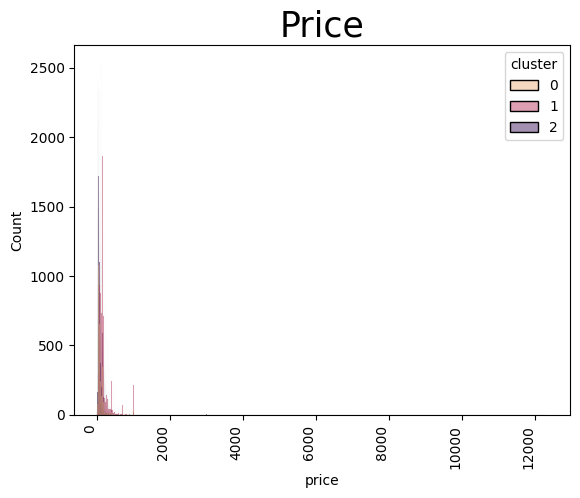

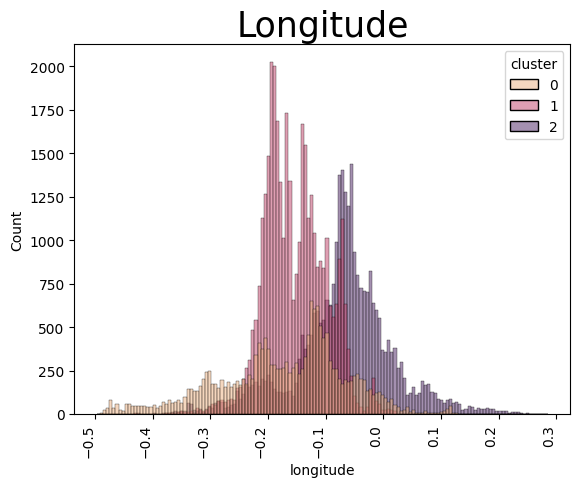

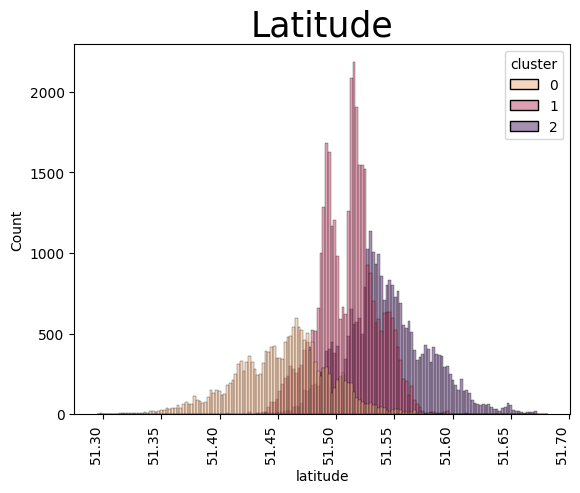

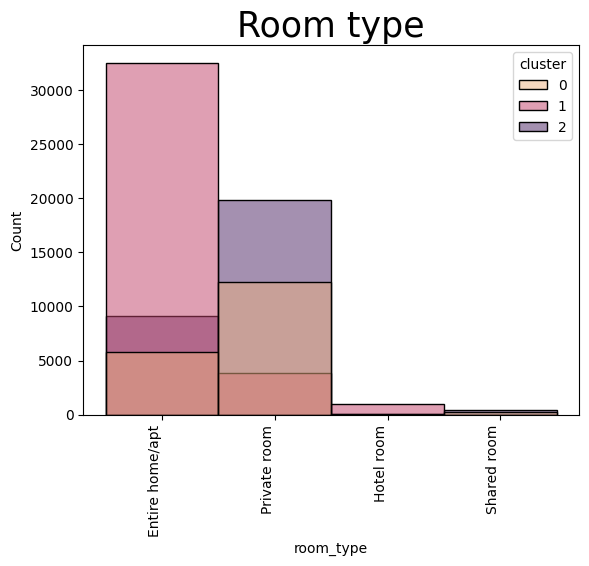

In [ ]:
for col in listings[['price', 'longitude', 'latitude', 'room_type']].columns:
    sns.histplot(data=listings,
                 x=col,
                 hue='cluster',
                 palette='flare')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'{col.capitalize().replace("_", " ")}', fontsize=25)
    plt.show()

In [ ]:
for cluster in range(3):
    i = 1
    print(f'Neighbourhoods in cluster {cluster}:')
    for elem in (listings.query(f'cluster == {cluster}')['neighbourhood'].unique()):
        print(f'{i}. {elem}')
        i += 1
    print(25*'_', '\n')

Neighbourhoods in cluster 0:
1. Brixton
2. LB of Croydon
3. LB of Wandsworth
4. LB of Merton
5. LB of Hammersmith & Fulham
6. Peckham
7. LB of Lambeth
8. LB of Hounslow
9. LB of Southwark
10. LB of Richmond upon Thames
11. Fulham
12. LB of Ealing
13. Camberwell
14. Hammersmith
15. Walworth
16. Upper Tooting
17. LB of Lewisham
18. Stockwell
19. Streatham
20. LB of Bromley
21. Acton
22. Battersea
23. Wimbledon
24. Bellingham
25. New Cross
26. LB of Hillingdon
27. Shepherd's Bush
28. Brockley
29. Herne Hill
30. Lee
31. Lower Streatham
32. Perry Vale
33. Lewisham
34. Kennington
35. Putney
36. Downham
37. West Dulwich
38. Nunhead
39. Hither Green
40. RB of Kingston upon Thames
41. West Norwood
42. Forest Hill
43. Parsons Green
44. Sydenham
45. Tulse Hill
46. Crystal Palace
47. Beckenham
48. Lambeth
49. LB of Harrow
50. Earlsfield
51. LB of Brent
52. Clapham
53. RB of Greenwich
54. Wandsworth
55. LB of Bexley
56. Dulwich
57. Balham
58. South Lambeth
59. Sands End
60. Richmond
61. Furzedown
6

In [ ]:
i = 1
not_0 = set(listings.query('cluster != 0')['neighbourhood'].to_list())
is_0 = set(listings.query('cluster == 0')['neighbourhood'].to_list())
in_0_and_1_or_2 = set(not_0).intersection(is_0)
print('Neighbourhoods in cluster 0 that are listed for another cluster:')
for elem in in_0_and_1_or_2:
    print(f'{i}. {elem}')
    i += 1

Neighbourhoods in cluster 0 that are listed for another cluster:
1. Southfields
2. Tooting Bec
3. LB of Lambeth
4. Fulham
5. Blackheath
6. Vauxhall
7. LB of Hillingdon
8. South Lambeth
9. Wandsworth
10. Kennington
11. LB of Hounslow
12. Earls Court
13. Parsons Green
14. Earlsfield
15. Bayswater
16. Clapham
17. Stockwell
18. Wimbledon
19. Battersea
20. LB of Hammersmith & Fulham
21. LB of Ealing
22. LB of Southwark
23. Putney
24. Kensington
25. LB of Richmond upon Thames
26. Richmond
27. East Dulwich
28. Peckham
29. LB of Harrow
30. LB of Lewisham
31. LB of Brent
32. Brixton
33. Pimlico
34. New Cross
35. Notting Hill
36. Upper Tooting
37. Walworth
38. Dulwich
39. RB of Kensington and Chelsea
40. Dulwich Village
41. Hammersmith
42. Nunhead
43. RB of Greenwich
44. City of Westminster
45. Sands End
46. Holland Park
47. Acton
48. Herne Hill
49. Lewisham
50. Shepherd's Bush
51. Lambeth
52. LB of Bexley
53. LB of Wandsworth


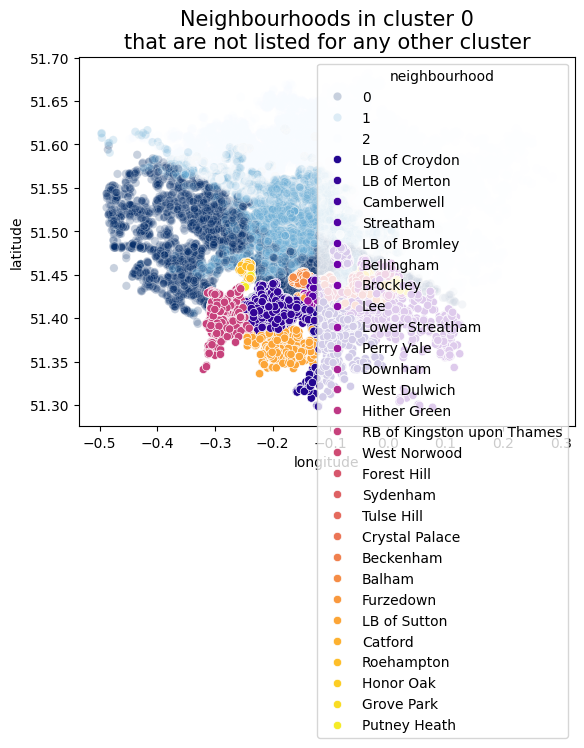

In [ ]:
sns.scatterplot(data=listings,y='latitude',x='longitude', hue='cluster', palette='Blues_r', alpha=.22)
sns.scatterplot(data=listings.query('(neighbourhood not in @in_0_and_1_or_2) and (cluster == 0)'),
                y='latitude',x='longitude',
                hue='neighbourhood', palette='plasma')
plt.title('Neighbourhoods in cluster 0\nthat are not listed for any other cluster', fontsize=15)
plt.show()

# Regression Modelling

Utilizing property information, our objective is to forecast its price. Within this segment, we will proceed to train various prevalent regression models with our data and assess their efficacy in price prediction.

To assess model performance, we initially partition the data into training and test sets. The training set is employed for model selection and training, while the test set is reserved for evaluating model performance.

In [ ]:
data = listings[['longitude','latitude','accommodates','room_type','beds','bathrooms','price']]

##Regression Models
We will fit out data into the following regression models:

*   Linear Regression
*   Ridge
*   Random Forest Regression

We use the model from sklearn. https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
# Step 1: Data Preparation
data_copy = data.dropna(subset=['price']).copy()  # Drop rows with missing target variable
X = data_copy.drop(columns=['price'])  # Independent variables
y = data_copy['price']  # Dependent variable

# Step 2: Define the preprocessing steps
# Handle missing values
num_cols = X.select_dtypes(include='number').columns
cat_cols = ['room_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Step 3: Define the models with preprocessing in a Pipeline
linear_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Building and Evaluation
models = {'Linear Regression': linear_model, 'Ridge Regression': ridge_model, 'Random Forest Regression': rf_model}
best_model = None
best_mse = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    if mse < best_mse:
        best_model = model
        best_mse = mse

Linear Regression:
Mean Squared Error: 37312.03460248567
R-squared: 0.15714534713362682
Ridge Regression:
Mean Squared Error: 37311.93462236962
R-squared: 0.1571476056195792
Random Forest Regression:
Mean Squared Error: 34198.9915583243
R-squared: 0.22746696969585267


In [ ]:
# More cross validation with the best model Random Forest
# Step 3: Define the best model with preprocessing in a Pipeline
model_for_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Perform cross-validation with the best model
cv_scores = cross_val_score(model_for_cv, X, y, cv=5, scoring='r2')
cv_r2_scores = cv_scores

print("Cross-Validation R2 Scores:", cv_r2_scores)
print("Mean R2:", cv_r2_scores.mean())

Cross-Validation R2 Scores: [-0.14490443 -0.01129882  0.02171855  0.14059995  0.10208548]
Mean R2: 0.02164014671493808


In [ ]:
# Very simple hyperparamter tuning, my computer does not have that much resources
# Step 3: Define the model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200],  # Number of trees in the forest
    'regressor__max_depth': [None, 10]  # Maximum depth of the trees
}

# Step 6: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Step 7: Best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Step 8: Evaluate the best model on the test set
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nBest Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}

Best Model Performance:
Mean Squared Error: 33628.711401917775
R-squared: 0.24034922841975992
